# Pymaceuticals Inc.

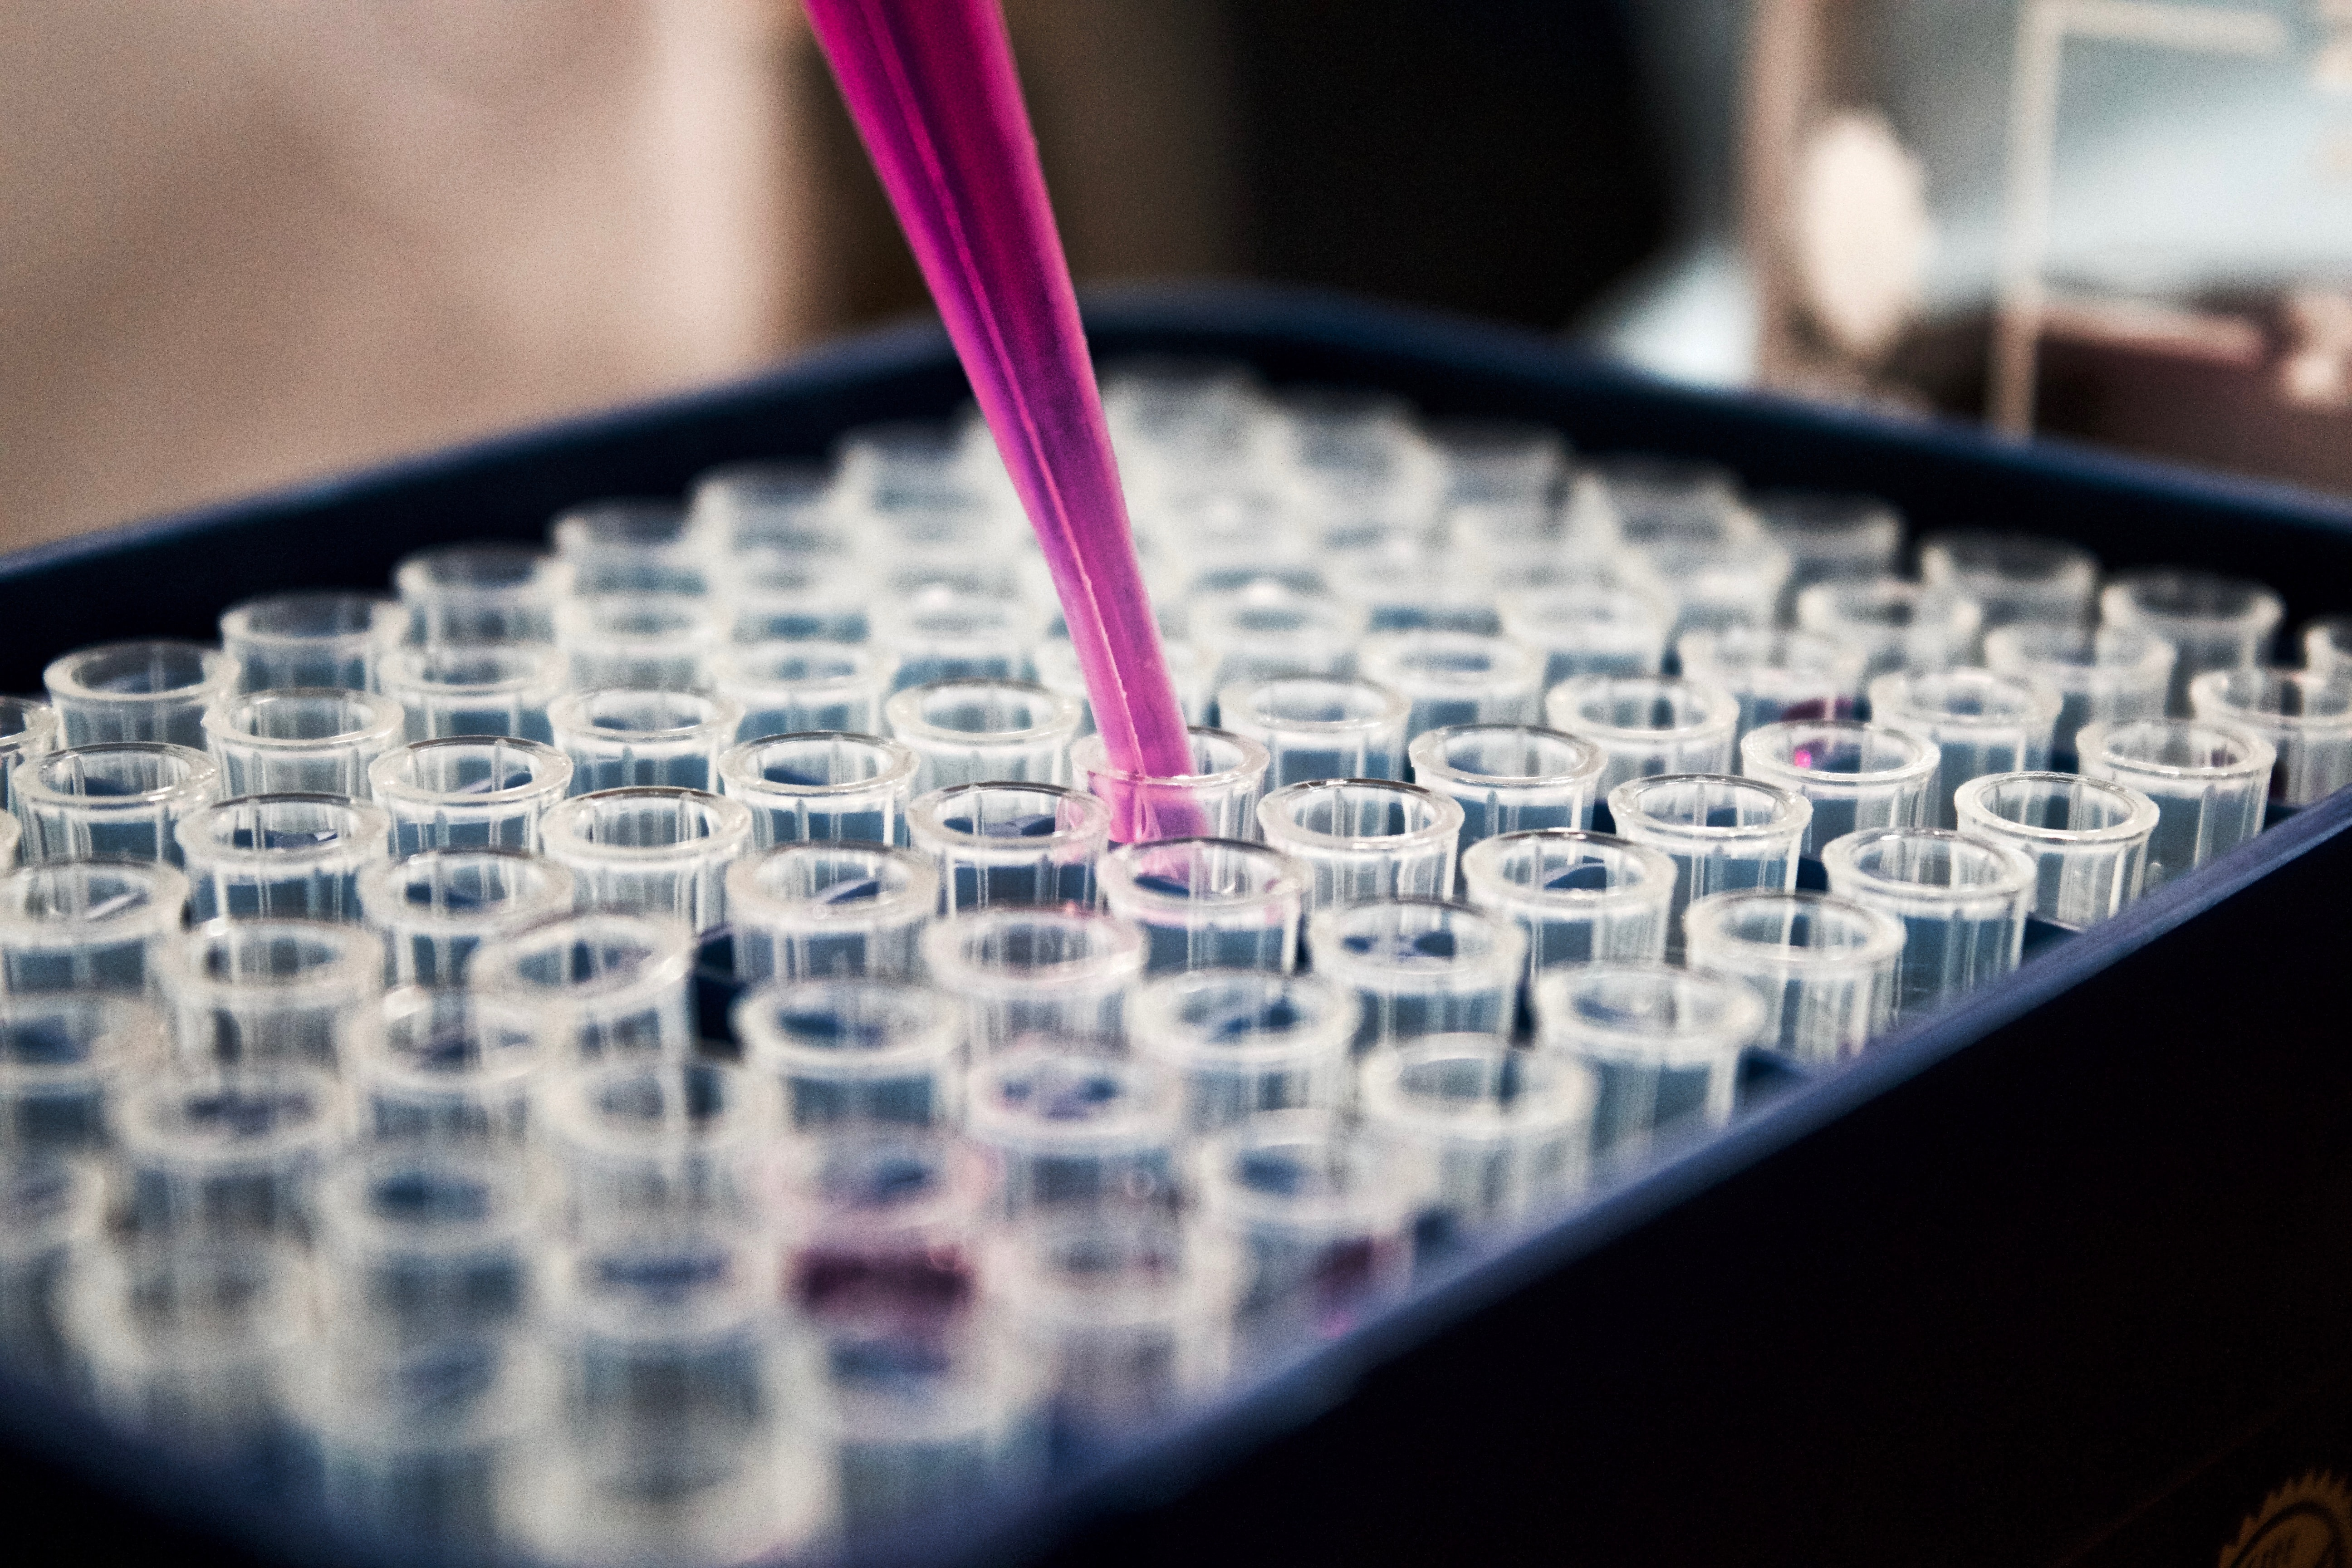

Source: Unsplash (Louis Reed)


### Analysis
- As evident in the scatter plot which assesses the relationship between the mouse weight and the average tumor size of mice in the Capomulin drug regimen, there is a strong correlation — roughly, 0.84 — between the two factors. 
<br>
- The drug regimens of 'Capomulin' and 'Ramicane' were both effective in treating the tumor, with the former being slightly more effective.
<br>
- On the contrary, 'Infubinol' and 'Ceftamin' seemingly had the adverse effect of increasing the size of the tumors. This conclusion, however, is not certain at this time as there may be other factors that may have lead to this. 

In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from pathlib import Path

# Creating CSV file paths 
mouse_metadata_path = Path('Data/Mouse_metadata.csv')
study_results_path = Path('Data/Study_results.csv')

# Reading the CSV file paths
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combining the two data into a single DataFrame
merged_data_df = pd.merge(study_results_df, mouse_metadata_df, on='Mouse ID', how='left')

# Displaying the merged DataFrame
merged_data_df

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0        b128          0           45.000000                 0    Capomulin   
1        f932          0           45.000000                 0     Ketapril   
2        g107          0           45.000000                 0     Ketapril   
3        a457          0           45.000000                 0     Ketapril   
4        c819          0           45.000000                 0     Ketapril   
...       ...        ...                 ...               ...          ...   
1888     r944         45           41.581521                 2    Capomulin   
1889     u364         45           31.023923                 3    Capomulin   
1890     p438         45           61.433892                 1     Ceftamin   
1891     x773         45           58.634971                 4      Placebo   
1892     b879         45           72.555239                 2     Stelasyn   

         Sex  Age_months  Weight (g)  
0     Female           9          22  
1       Male          15          29  
2     Female           2          29  
3     Female          11          30  
4       Male          21          25  
...      ...         ...         ...  
1888    Male          12          25  
1889    Male          18          17  
1890  Female          11          26  
1891  Female          21          30  
1892  Female           4          26  

[1893 rows x 8 columns]

In [2]:
# Counting the number of mice
merged_data_df['Mouse ID'].nunique()


249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_data_df[merged_data_df.duplicated(["Mouse ID", "Timepoint"])]["Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Use loc to look through the column 'Mouse ID' and match with ID 'g989'
duplicate_mice_df = merged_data_df.loc[merged_data_df['Mouse ID'] == 'g989']
duplicate_mice_df

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   
1195     g989         25           56.045564                 1     Propriva   
1380     g989         30           59.082294                 1     Propriva   
1592     g989         35           62.570880                 2     Propriva   

         Sex  Age_months  Weight (g)  
107   Female          21          26  
137   Female          21          26  
329   Female          21          26  
360   Female          21          26  
620   Female          21          26  
681   Female          21          26  
815   Female          21          26  
869   Female          21          26  
950   Female          21          26  
1111  Female          21          26  
1195  Female          21          26  
1380  Female          21          26  
1592  Female          21          26

In [5]:
# Creating a new DataFrame after removing the duplicate mice 
clean_merged_df = merged_data_df.loc[merged_data_df["Mouse ID"] != 'g989']
clean_merged_df

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0        b128          0           45.000000                 0    Capomulin   
1        f932          0           45.000000                 0     Ketapril   
2        g107          0           45.000000                 0     Ketapril   
3        a457          0           45.000000                 0     Ketapril   
4        c819          0           45.000000                 0     Ketapril   
...       ...        ...                 ...               ...          ...   
1888     r944         45           41.581521                 2    Capomulin   
1889     u364         45           31.023923                 3    Capomulin   
1890     p438         45           61.433892                 1     Ceftamin   
1891     x773         45           58.634971                 4      Placebo   
1892     b879         45           72.555239                 2     Stelasyn   

         Sex  Age_months  Weight (g)  
0     Female           9          22  
1       Male          15          29  
2     Female           2          29  
3     Female          11          30  
4       Male          21          25  
...      ...         ...         ...  
1888    Male          12          25  
1889    Male          18          17  
1890  Female          11          26  
1891  Female          21          30  
1892  Female           4          26  

[1880 rows x 8 columns]

In [6]:
# Checking that the duplicate mice was completely removed
clean_merged_df["Mouse ID"].nunique()

248

# Summary Statistics

In [7]:
# Calculating the mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen.
tumor_mean = clean_merged_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
tumor_median = clean_merged_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
tumor_var = clean_merged_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
tumor_std = clean_merged_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
tumor_sem = clean_merged_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

# Creating a summary statistics DataFrame
summary_statistics = pd.DataFrame({"Mean Tumor Volume": tumor_mean,
                                  "Median Tumor Volume": tumor_median,
                                  "Tumor Volume Variance": tumor_var,
                                  "Tumor Volume Std. Dev.": tumor_std,
                                  "Tumor Volume Std. Err.": tumor_sem})
# Displaying the DataFrame
summary_statistics


Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume Std. Err.  
Drug Regimen                                                  
Capomulin                   4.994774                0.329346  
Ceftamin                    6.268188                0.469821  
Infubinol                   6.567243                0.492236  
Ketapril                    8.279709                0.603860  
Naftisol                    8.134708                0.596466  
Placebo                     7.821003                0.581331  
Propriva                    6.622085                0.544332  
Ramicane                    4.846308                0.320955  
Stelasyn                    7.710419                0.573111  
Zoniferol                   6.966589                0.516398

In [8]:
# Using the aggregation method, we can obtain the same result as in the previous in a single line.
summary_stats_agg =  clean_merged_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats_agg

mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398

# Bar and Pie Charts

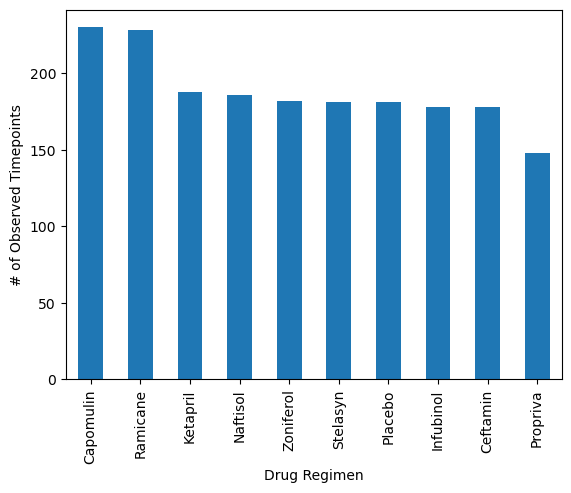

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_drug_regimen = clean_merged_df['Drug Regimen'].value_counts()
mice_drug_regimen.plot(kind='bar', xlabel='Drug Regimen',
                      ylabel='# of Observed Timepoints')
plt.show()

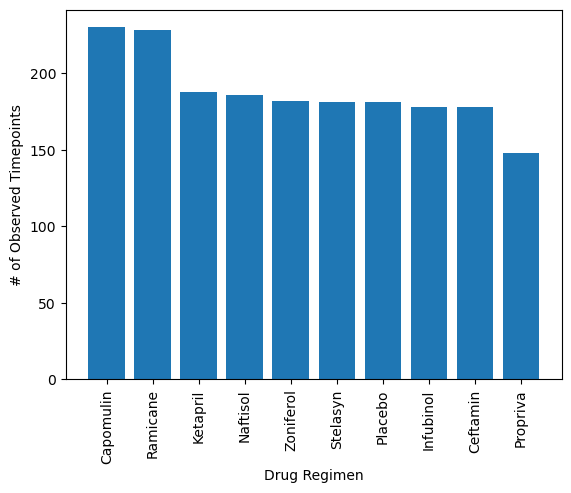

In [10]:
# Plotting the previous bar chart using pyplot.

x_values = mice_drug_regimen.index.values
y_values = mice_drug_regimen.values
plt.bar(x_values, y_values, align='center')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Timepoints')
plt.xticks(rotation='vertical')
plt.show()

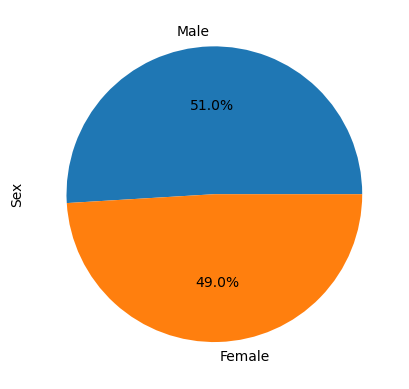

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_sex = clean_merged_df['Sex'].value_counts()
mice_sex.plot(kind='pie', label='Sex', autopct='%1.1f%%')
plt.show()

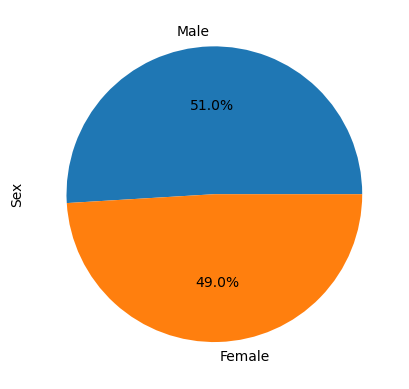

In [12]:
# Generating the previous pie chart using pyplot.
sex = mice_sex.index.values
sex_distribution = mice_sex.values
plt.pie(sex_distribution, labels=sex, autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()

# Quartiles, Outliers, and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

reduced_cleaned_data = clean_merged_df.loc[(clean_merged_df["Drug Regimen"] == 'Capomulin')|
                                          (clean_merged_df["Drug Regimen"] == 'Ramicane')|
                                          (clean_merged_df["Drug Regimen"] == 'Infubinol')|
                                          (clean_merged_df["Drug Regimen"] == 'Ceftamin'), :]

last_timepoints = pd.DataFrame(reduced_cleaned_data.groupby(['Mouse ID'])['Timepoint'].max())
last_timepoints = last_timepoints.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoints_merge = last_timepoints.merge(clean_merged_df, on=['Mouse ID', 'Timepoint'], how='left')
last_timepoints_merge

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0      a203         45           67.973419                 2    Infubinol   
1      a251         45           65.525743                 1    Infubinol   
2      a275         45           62.999356                 3     Ceftamin   
3      a411         45           38.407618                 1     Ramicane   
4      a444         45           43.047543                 0     Ramicane   
..      ...        ...                 ...               ...          ...   
95     y769         45           68.594745                 4     Ceftamin   
96     y793         45           31.896238                 2    Capomulin   
97     y865         45           64.729837                 3     Ceftamin   
98     z578         45           30.638696                 0     Ramicane   
99     z581         45           62.754451                 3    Infubinol   

       Sex  Age_months  Weight (g)  
0   Female          20          23  
1   Female          21          25  
2   Female          20          28  
3     Male           3          22  
4   Female          10          25  
..     ...         ...         ...  
95  Female           6          27  
96    Male          17          17  
97    Male          23          26  
98    Male          11          16  
99  Female          24          25  

[100 rows x 8 columns]

In [14]:
# List of treatments
treatments = ['Capomulin', 'Ramicane', "Infubinol", 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

for treatment in treatments:
    tumor_vol_subset = last_timepoints_merge.loc[last_timepoints_merge['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    tumor_vol_data.append(tumor_vol_subset)

tumor_vol_data
    
outliers = []

# Iterate through each tumor volume data (treatment)
for treatment_data in tumor_vol_data:
    # Calculate the IQR and determine potential outliers for the current treatment
    quartiles = treatment_data.quantile([0.25, 0.75])
    lower_bound = quartiles[0.25] - 1.5 * (quartiles[0.75] - quartiles[0.25])
    upper_bound = quartiles[0.75] + 1.5 * (quartiles[0.75] - quartiles[0.25])
    
    # Identify potential outliers and add them to the outliers list
    potential_outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    outliers.append(potential_outliers)

# Print the potential outliers for each treatment
for i, treatment in enumerate(treatments):
    print(f"Potential outliers for {treatment}: {outliers[i]}")
    

Potential outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Infubinol: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


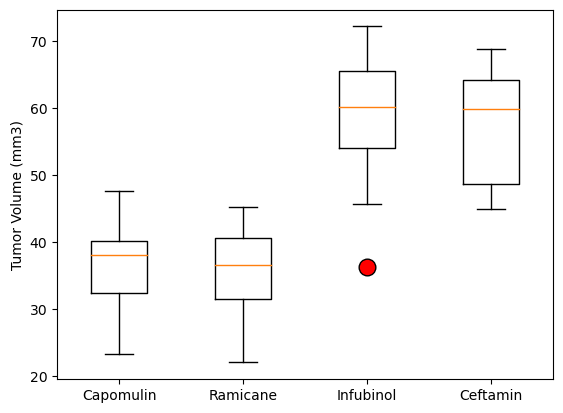

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.boxplot(tumor_vol_data, flierprops={'markerfacecolor': 'r', 'markersize': 12})
plt.ylabel("Tumor Volume (mm3)")
plt.xticks(range(1, len(treatments) +1), treatments)
plt.show()

# Line and Scatter Plots

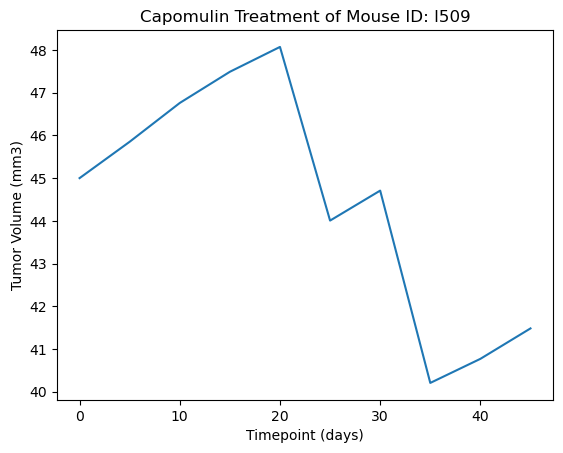

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = clean_merged_df[clean_merged_df['Mouse ID'] == 'l509']
plt.plot(mouse_id['Timepoint'], mouse_id["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse ID: l509")
plt.show()

/var/folders/z9/tl_qwvpn0y9dgcrs13m13smr0000gn/T/ipykernel_74791/2638079622.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capomulin_mouse = clean_merged_df[clean_merged_df["Drug Regimen"]=='Capomulin'].groupby('Mouse ID').mean()


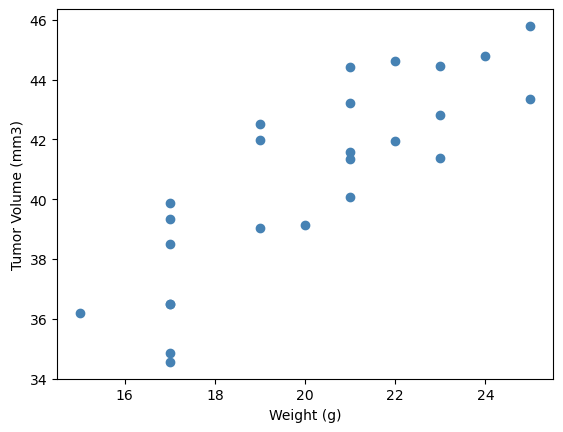

In [17]:
# Generating a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# First filter the 'clean_merged_df' dataframe by 'Capomulin' and then groupby the ID and apply the mean() method
# While all the data will be averaged, since the weight never changes, it is not a problem.

capomulin_mouse = clean_merged_df[clean_merged_df["Drug Regimen"]=='Capomulin'].groupby('Mouse ID').mean()

# Assign a variable to the x and y_values that are to be plotted
capo_mouse_weight = capomulin_mouse['Weight (g)']
capo_mouse_average = capomulin_mouse["Tumor Volume (mm3)"]

# Plot the data and display
plt.scatter(capo_mouse_weight, capo_mouse_average, facecolors='steelblue', marker='o')
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

The correlation between mouse weight and the average tumor volume is 0.84


/var/folders/z9/tl_qwvpn0y9dgcrs13m13smr0000gn/T/ipykernel_74791/1761030216.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capomulin_mouse = clean_merged_df[clean_merged_df["Drug Regimen"]=='Capomulin'].groupby('Mouse ID').mean()


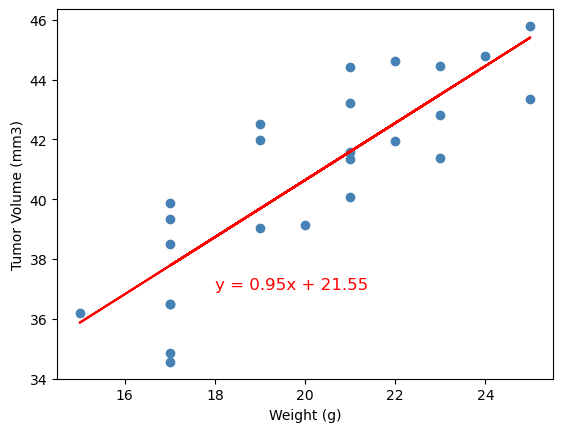

In [18]:
# Data from the previous scatter plot.
capomulin_mouse = clean_merged_df[clean_merged_df["Drug Regimen"]=='Capomulin'].groupby('Mouse ID').mean()
capo_mouse_weight = capomulin_mouse['Weight (g)']
capo_mouse_average = capomulin_mouse["Tumor Volume (mm3)"]

# Calculating the correlation coefficient and a linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capo_mouse_weight, capo_mouse_average)
regress_values = capo_mouse_weight * slope + intercept

# Equation of the line (for annotation)
line_equation = f"y = {round(slope,2)}x + {round(intercept,2)}"

correlation = st.pearsonr(capo_mouse_weight, capo_mouse_average)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0], 2)}")

# Plot the chart
plt.scatter(capo_mouse_weight, capo_mouse_average, facecolors='steelblue', marker='o')
plt.plot(capo_mouse_weight, regress_values, 'r-')
plt.annotate(line_equation, (18,37), fontsize=12, color='r')
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()
